# Part 4 - Build Machine Learning Model
Eric Kwok

This notebook is based on [Bioinformatics Project - Computational Drug Discovery [Part 4] Comparing Classifiers for Building Classification Models](https://github.com/dataprofessor/code/blob/master/python/CDD_ML_Part_4_Acetylcholinesterase_Regression_Random_Forest.ipynb) by Chanin Nantasenamat.

In this part, we will build a regression model of influenza A inhibitors using the random forest algorithm.

---

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load data set

In [2]:
df = pd.read_csv('influenza_a_pIC50_pubchem_fp.csv', index_col='Name')
compound_names = df.index  # Save index for later use
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
Name,,,,,,,,,,,,,,,,,,,,,
CHEMBL109162,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.397940
CHEMBL109162,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.000000
CHEMBL324455,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.124939
CHEMBL324455,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
CHEMBL327097,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4294489,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
CHEMBL4283912,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.392545
CHEMBL4294084,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000


## Specify input and output
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### Input features

In [3]:
X = df.drop(columns=['pIC50'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
Name,,,,,,,,,,,,,,,,,,,,,
CHEMBL109162,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL109162,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL324455,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL324455,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL327097,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4294489,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4283912,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4294084,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Output variable

In [4]:
Y = df.pIC50
Y

Name
CHEMBL109162     2.397940
CHEMBL109162     2.000000
CHEMBL324455     3.124939
CHEMBL324455     3.000000
CHEMBL327097     2.301030
                   ...   
CHEMBL4294489    4.000000
CHEMBL4283912    4.392545
CHEMBL4294084    4.000000
CHEMBL4286184    5.173925
CHEMBL4282791    4.477556
Name: pIC50, Length: 1591, dtype: float64

### Examine data dimensions

In [5]:
X.shape

(1591, 881)

In [6]:
Y.shape

(1591,)

### Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = selection.fit_transform(X)

In [8]:
X.shape

(1591, 173)

## Data split (80/20 ratio)

In [9]:
X_train, X_test, Y_train, Y_test, train_idx, test_idx = train_test_split(X, Y, compound_names, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((1272, 173), (1272,))

In [11]:
X_test.shape, Y_test.shape

((319, 173), (319,))

## Building a Regression Model using Random Forest

In [12]:
import numpy as np

np.random.seed(0)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)  # Coefficient of determination R^2 of prediction
r2

0.4962521675217888

In [13]:
Y_pred = model.predict(X_test)
Y_pred = pd.DataFrame(Y_pred)
Y_pred.index = test_idx
pred_vs_actual = pd.concat([Y_pred, Y_test], axis=1)
pred_vs_actual.columns = ['Predicted pIC50', 'Actual pIC50']
pred_vs_actual

,Predicted pIC50,Actual pIC50
Name,,
CHEMBL154,5.143043,4.906578
CHEMBL202274,5.346228,5.066513
CHEMBL333844,9.335796,8.428291
CHEMBL3764975,5.068194,5.346787
CHEMBL222813,8.426706,9.366532
...,...,...
CHEMBL139367,8.307119,7.861697
CHEMBL466246,8.426706,9.214670
CHEMBL3819510,5.322215,4.321709


In [14]:
pred_vs_actual.to_csv('predictions.csv', index=True)

## Scatter Plot of Predicted vs. Actual pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

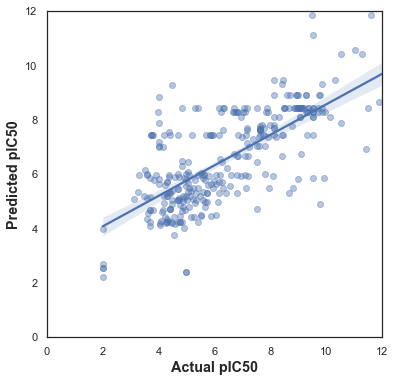

In [15]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style('white')

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Actual pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(6, 6)
plt.show